In [ ]:
# Install necessary libraries
!pip install beautifulsoup4 requests textblob matplotlib


In [ ]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup

# Function to get the headlines from Hindustan Times
def get_ht_headlines():
    url = 'https://www.hindustantimes.com/latest-news'
    headers = {'User-Agent': 'Mozilla/5.0'}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    # Finding all the headlines
    news_items = soup.find_all('h3', class_='hdg3')

    headlines = []
    for item in news_items:
        if item.text.strip():
            headlines.append(item.text.strip())
    return headlines

# Get the headlines from the Hindustan Times
headlines = get_ht_headlines()
print(f"Total headlines scraped: {len(headlines)}")
headlines[:5]


Total headlines scraped: 29


['Chinese Zodiac Horoscope Today for April 28, 2025',
 "Wanted criminal's joy ride cut short as Delhi police nab him after tip-off",
 "Coppola receives AFI Life Achievement Award; 'The Godfather' stars Pacino, De Niro pay tribute",
 'MG Windsor EV long-range variant in pipeline, launch likely next month',
 'MAH MBA/MMS CET Answer Key 2025 releasing tomorrow at cetcell.mahacet.org']

# -----------------------------------------------
# Data Preprocessing and Sentiment Analysis
# -----------------------------------------------

In [ ]:
# Importing pandas and TextBlob for sentiment analysis
import pandas as pd
from textblob import TextBlob

# Creating a DataFrame with the scraped headlines
df = pd.DataFrame({'headline': headlines})
df.head()

# Sentiment Analysis function using TextBlob
# In this function, we will apply the TextBlob library to determine the polarity of the headline.
# TextBlob calculates sentiment polarity ranging from -1 (negative) to 1 (positive).

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive' # Sentiment is positive
    elif blob.sentiment.polarity < 0:
        return 'Negative'  # Sentiment is negative
    else:
        return 'Neutral' # Neutral sentiment

# Applying the sentiment analysis function to each headlin
df['sentiment'] = df['headline'].apply(get_sentiment)
df.head()


,headline,sentiment
0,IQ test: Think you’re a genius? Try solving th...,Neutral
1,How Demi Moore's iconic 1991 body paint shoot ...,Positive
2,"Pak woman, living in Odisha for 35 years, worr...",Neutral
3,OPSC OCS Main Exam: Important notice on option...,Positive
4,Woman who lost 6 kg in 6 weeks shares 3 things...,Positive


# -----------------------------------------------
# Visualization
# -----------------------------------------------

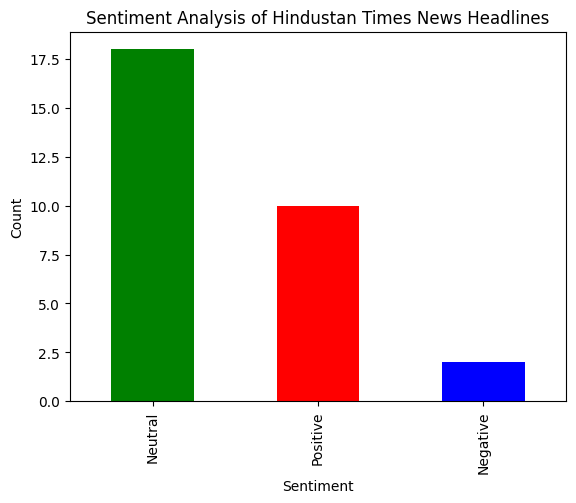

In [ ]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Getting the count of each sentiment category
sentiment_count = df['sentiment'].value_counts()

# Plotting
sentiment_count.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Hindustan Times News Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# -----------------------------------------------
# Math Concepts Used
# -----------------------------------------------

# 1. **Sentiment Analysis using TextBlob**:
# - TextBlob uses **polarity scores** to classify the sentiment of the text.
# - **Polarity**: The degree of sentiment, ranging from -1 (most negative) to 1 (most positive).
#   Sentiment polarity is calculated using Natural Language Processing (NLP) techniques, often based on machine learning models, which calculate how positive or negative a text is.
# - The calculation of sentiment involves analyzing the words in the text and checking their relationship to predefined positive or negative words (lexicons).

# 2. **Bar Plot**:
# - A bar plot visualizes the sentiment distribution.
# - The heights of the bars represent the frequency of each sentiment, which is a statistical measure, giving us a quick visual insight into the sentiment of the headlines.
# - This is a basic form of **data visualization** using concepts of **probability distributions** where we map categories (positive, negative, neutral) to the frequency of their occurrence.

# -----------------------------------------------
# Conclusion
# -----------------------------------------------

# In this notebook, we have successfully scraped live data from the Hindustan Times website,
# performed sentiment analysis on the headlines, and visualized the distribution of sentiments.
# The sentiment analysis was based on polarity scores calculated using TextBlob, and we applied basic data visualization techniques to show the sentiment distribution.